In [1]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [3]:
# Load Data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [7]:
batch_size = 64

train_loader = DataLoader(training_data, batch_size = batch_size)
test_loader = DataLoader(test_data, batch_size = batch_size)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [15]:
labels[0]

tensor(9)

In [11]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

classes[labels[7].item()]

'Pullover'

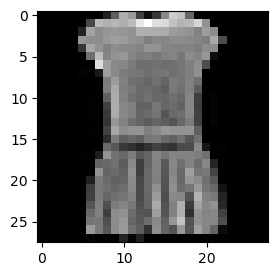

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(images[3].squeeze(), cmap="gray")
plt.show()

In [19]:
# bulid Neural Netowork
device = ("cuda" if torch.cuda.is_available()
else "mps" if torch.backends.mps.is_available()
else "cpu")
device

'cpu'

In [25]:
class ClothsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        )
        
    def forward(self, x):
        return self.network(x)

In [27]:
model = ClothsClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [29]:
#training
epochs = 2
model.train()

for epoch in range(epochs):
    for batch, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        #forword pass
        pred = model(images)
        loss = loss_fn(pred, labels)

        #backword pass
        loss.backward()

        #weight update
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"Batch: {batch}, Loss: {loss.item()}")

# SGD Without momentum (2.29 => 2.03)
# SGD with momentum (2.29 => 0.65)
# ADAM (2.29 => 0.53)

Batch: 0, Loss: 2.2973263263702393
Batch: 100, Loss: 0.8250855207443237
Batch: 200, Loss: 0.42977556586265564
Batch: 300, Loss: 0.5938869118690491
Batch: 400, Loss: 0.5210124254226685
Batch: 500, Loss: 0.46275460720062256
Batch: 600, Loss: 0.46321210265159607
Batch: 700, Loss: 0.6575552225112915
Batch: 800, Loss: 0.5758390426635742
Batch: 900, Loss: 0.521683931350708
Batch: 0, Loss: 0.28614744544029236
Batch: 100, Loss: 0.422220915555954
Batch: 200, Loss: 0.3196321129798889
Batch: 300, Loss: 0.4850274324417114
Batch: 400, Loss: 0.3715336322784424
Batch: 500, Loss: 0.3627432882785797
Batch: 600, Loss: 0.3723272979259491
Batch: 700, Loss: 0.5407589077949524
Batch: 800, Loss: 0.49283233284950256
Batch: 900, Loss: 0.53221195936203


In [31]:
# Testing the model
model.eval()  # Switch to evaluation mode

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        # Append labels and predictions to lists
        all_labels.extend(labels.cpu().numpy())    
        all_predicted.extend(predicted.cpu().numpy()) 

In [33]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.96      0.97      0.97      1000
           2       0.84      0.63      0.72      1000
           3       0.86      0.85      0.86      1000
           4       0.62      0.90      0.74      1000
           5       0.98      0.92      0.95      1000
           6       0.72      0.53      0.61      1000
           7       0.88      0.98      0.93      1000
           8       0.94      0.97      0.96      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

